# Decision Tree Algorithm

### Import Libraries and DAta

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [2]:
path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Specialization - Machine Learning\Achievement 1\Data Sets'

In [3]:
# Importing Climate Wins Scaled Dataset
climate =  pd.read_csv(os.path.join(path, 'ClimateWins_Scaled_new.csv'))

In [4]:
# Inspecting
climate.head()

,Unnamed: 0,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [5]:
climate.columns

Index(['Unnamed: 0', 'id', 'DATE', 'MONTH', 'BASEL_cloud_cover',
       'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=172)

In [6]:
# Importing Answers Dataset
pleasant =  pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
# Inspecting
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data Preparation

In [8]:
columns = climate.columns.tolist()

In [9]:
print(len(columns))
columns

172


['Unnamed: 0',
 'id',
 'DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'D

In [10]:
to_drop = [
    'GDANSK_cloud_cover',
    'GDANSK_humidity',
    'GDANSK_precipitation',
    'GDANSK_snow_depth',
    'GDANSK_temp_mean',
    'GDANSK_temp_min',
    'GDANSK_temp_max',

    'ROMA_cloud_cover',
    'ROMA_wind_speed',
    'ROMA_humidity',
    'ROMA_pressure',
    'ROMA_sunshine',
    'ROMA_temp_mean',

    'TOURS_wind_speed',
    'TOURS_humidity',
    'TOURS_pressure',
    'TOURS_global_radiation',
    'TOURS_precipitation',
    'TOURS_temp_mean',
    'TOURS_temp_min',
    'TOURS_temp_max',

    'Unnamed: 0',
    'id'
]

In [11]:
for col in to_drop:
    columns.remove(col)

In [12]:
len(columns)

149

In [13]:
climate_2 = climate[columns]

In [14]:
climate_2.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


### Data Split

In [15]:
X = climate_2.drop(columns=['DATE', 'MONTH'])
y = pleasant.drop(columns=['DATE'])

In [16]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [17]:
#Split data into Training and Test mode
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


### Decision Tree Classifier

[Text(0.3686922380143362, 0.9807692307692307, 'x[49] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06428452401897854, 0.9423076923076923, 'x[98] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.21648838101665738, 0.9615384615384615, 'True  '),
 Text(0.01834565571572934, 0.9038461538461539, 'x[19] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.

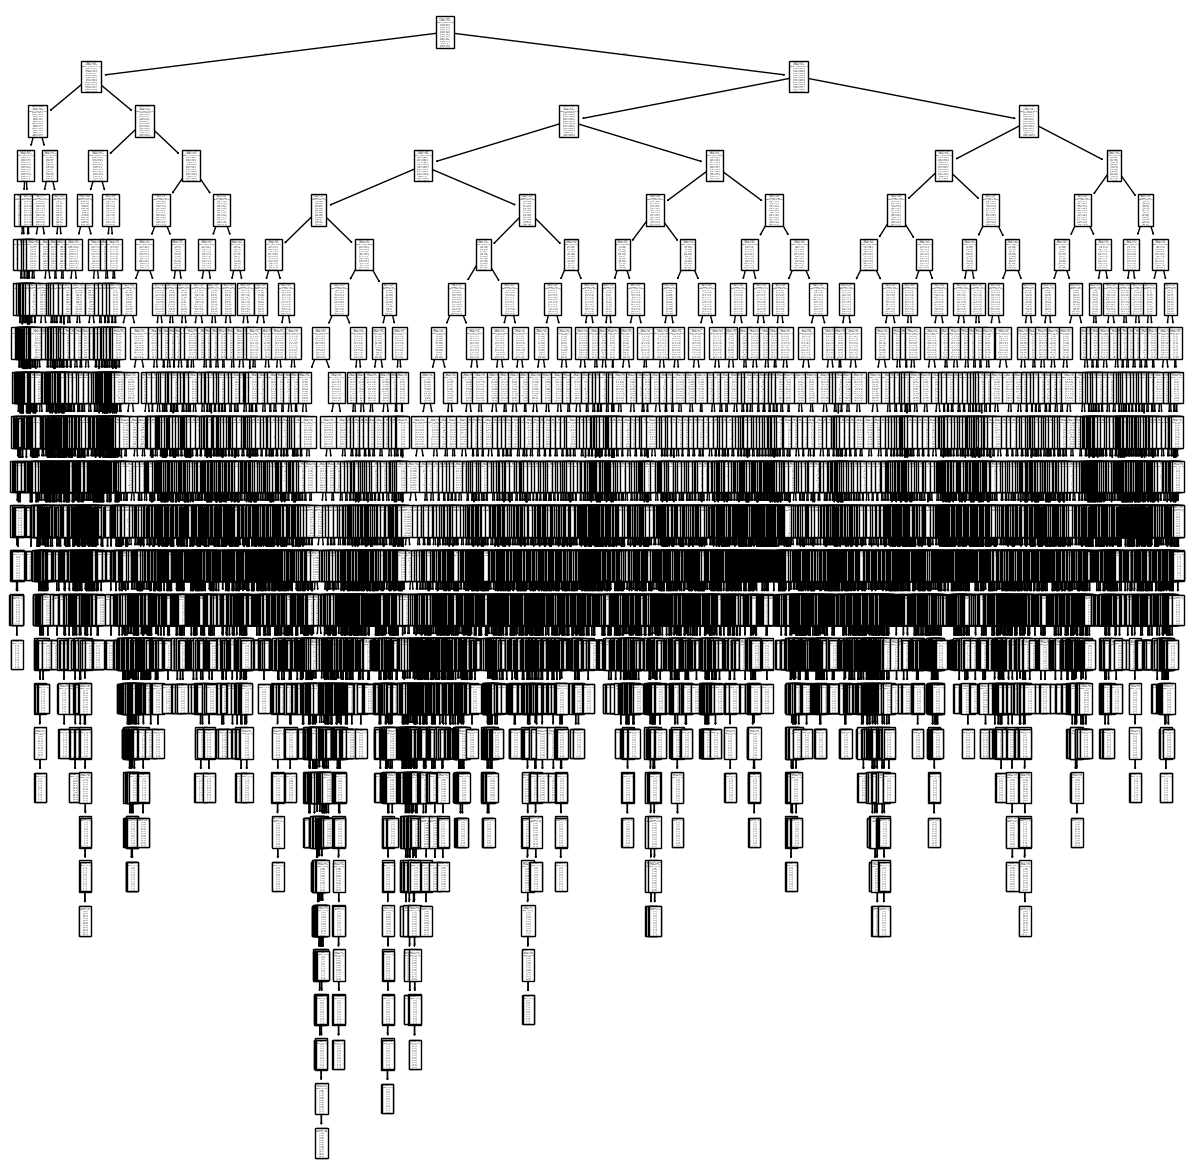

In [19]:
decisiontree = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
decisiontree.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(decisiontree)

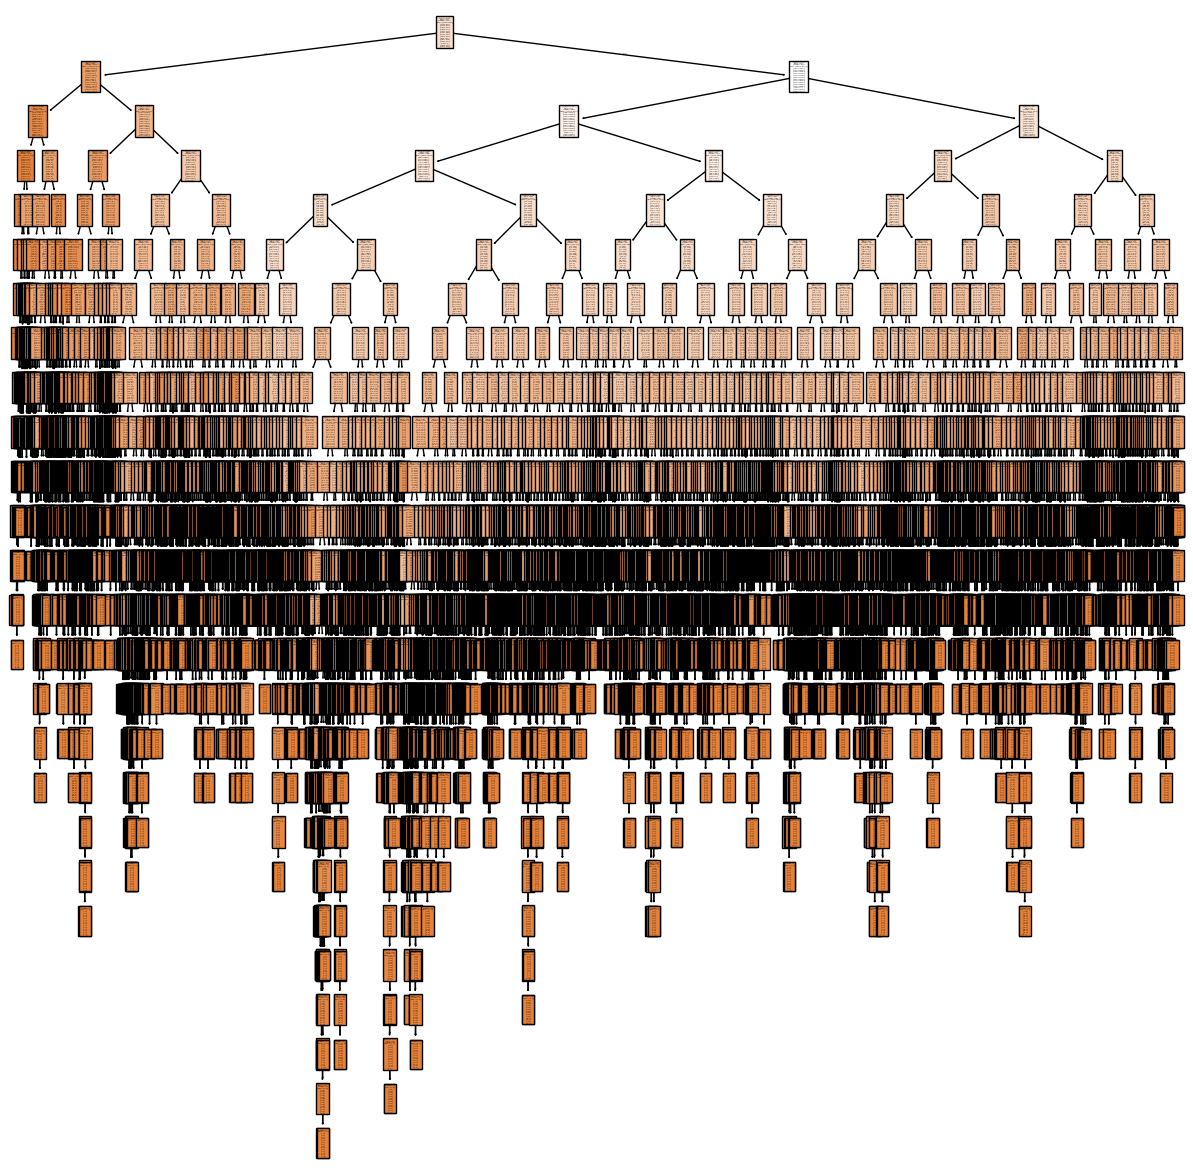

In [22]:
decisiontree = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
decisiontree.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(decisiontree, filled=True)
plt.show()

In [45]:
# Compute training accuracy score
y_pred_train = decisiontree.predict(X_train)
print('Train accuracy score: ',cross_val_score(decisiontree, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.5994074448687127


In [44]:
# Compute test accuracy score
test_accuracy = decisiontree.score(X_test, y_test)
print('Test accuracy score: ', test_accuracy)

Test accuracy score:  0.634541652143604


In [24]:
y_pred = decisiontree.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.634541652143604


array([[[4146,  192],
        [ 161, 1239]],

       [[3638,  138],
        [ 105, 1857]],

       [[3748,  152],
        [ 134, 1704]],

       [[4408,  229],
        [ 182,  919]],

       [[4479,   28],
        [  32, 1199]],

       [[4278,  292],
        [ 241,  927]],

       [[4667,  148],
        [ 146,  777]],

       [[4136,   59],
        [  42, 1501]],

       [[4336,  226],
        [ 190,  986]],

       [[3004,  164],
        [ 137, 2433]],

       [[4361,  185],
        [ 161, 1031]],

       [[4736,  143],
        [ 136,  723]],

       [[5738,    0],
        [   0,    0]],

       [[4503,  263],
        [ 267,  705]],

       [[5273,  189],
        [ 184,   92]]])

### Confusion Matrix

In [25]:
locations = list({x.split("_")[0] for x in climate_2.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

C:\Users\ophab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


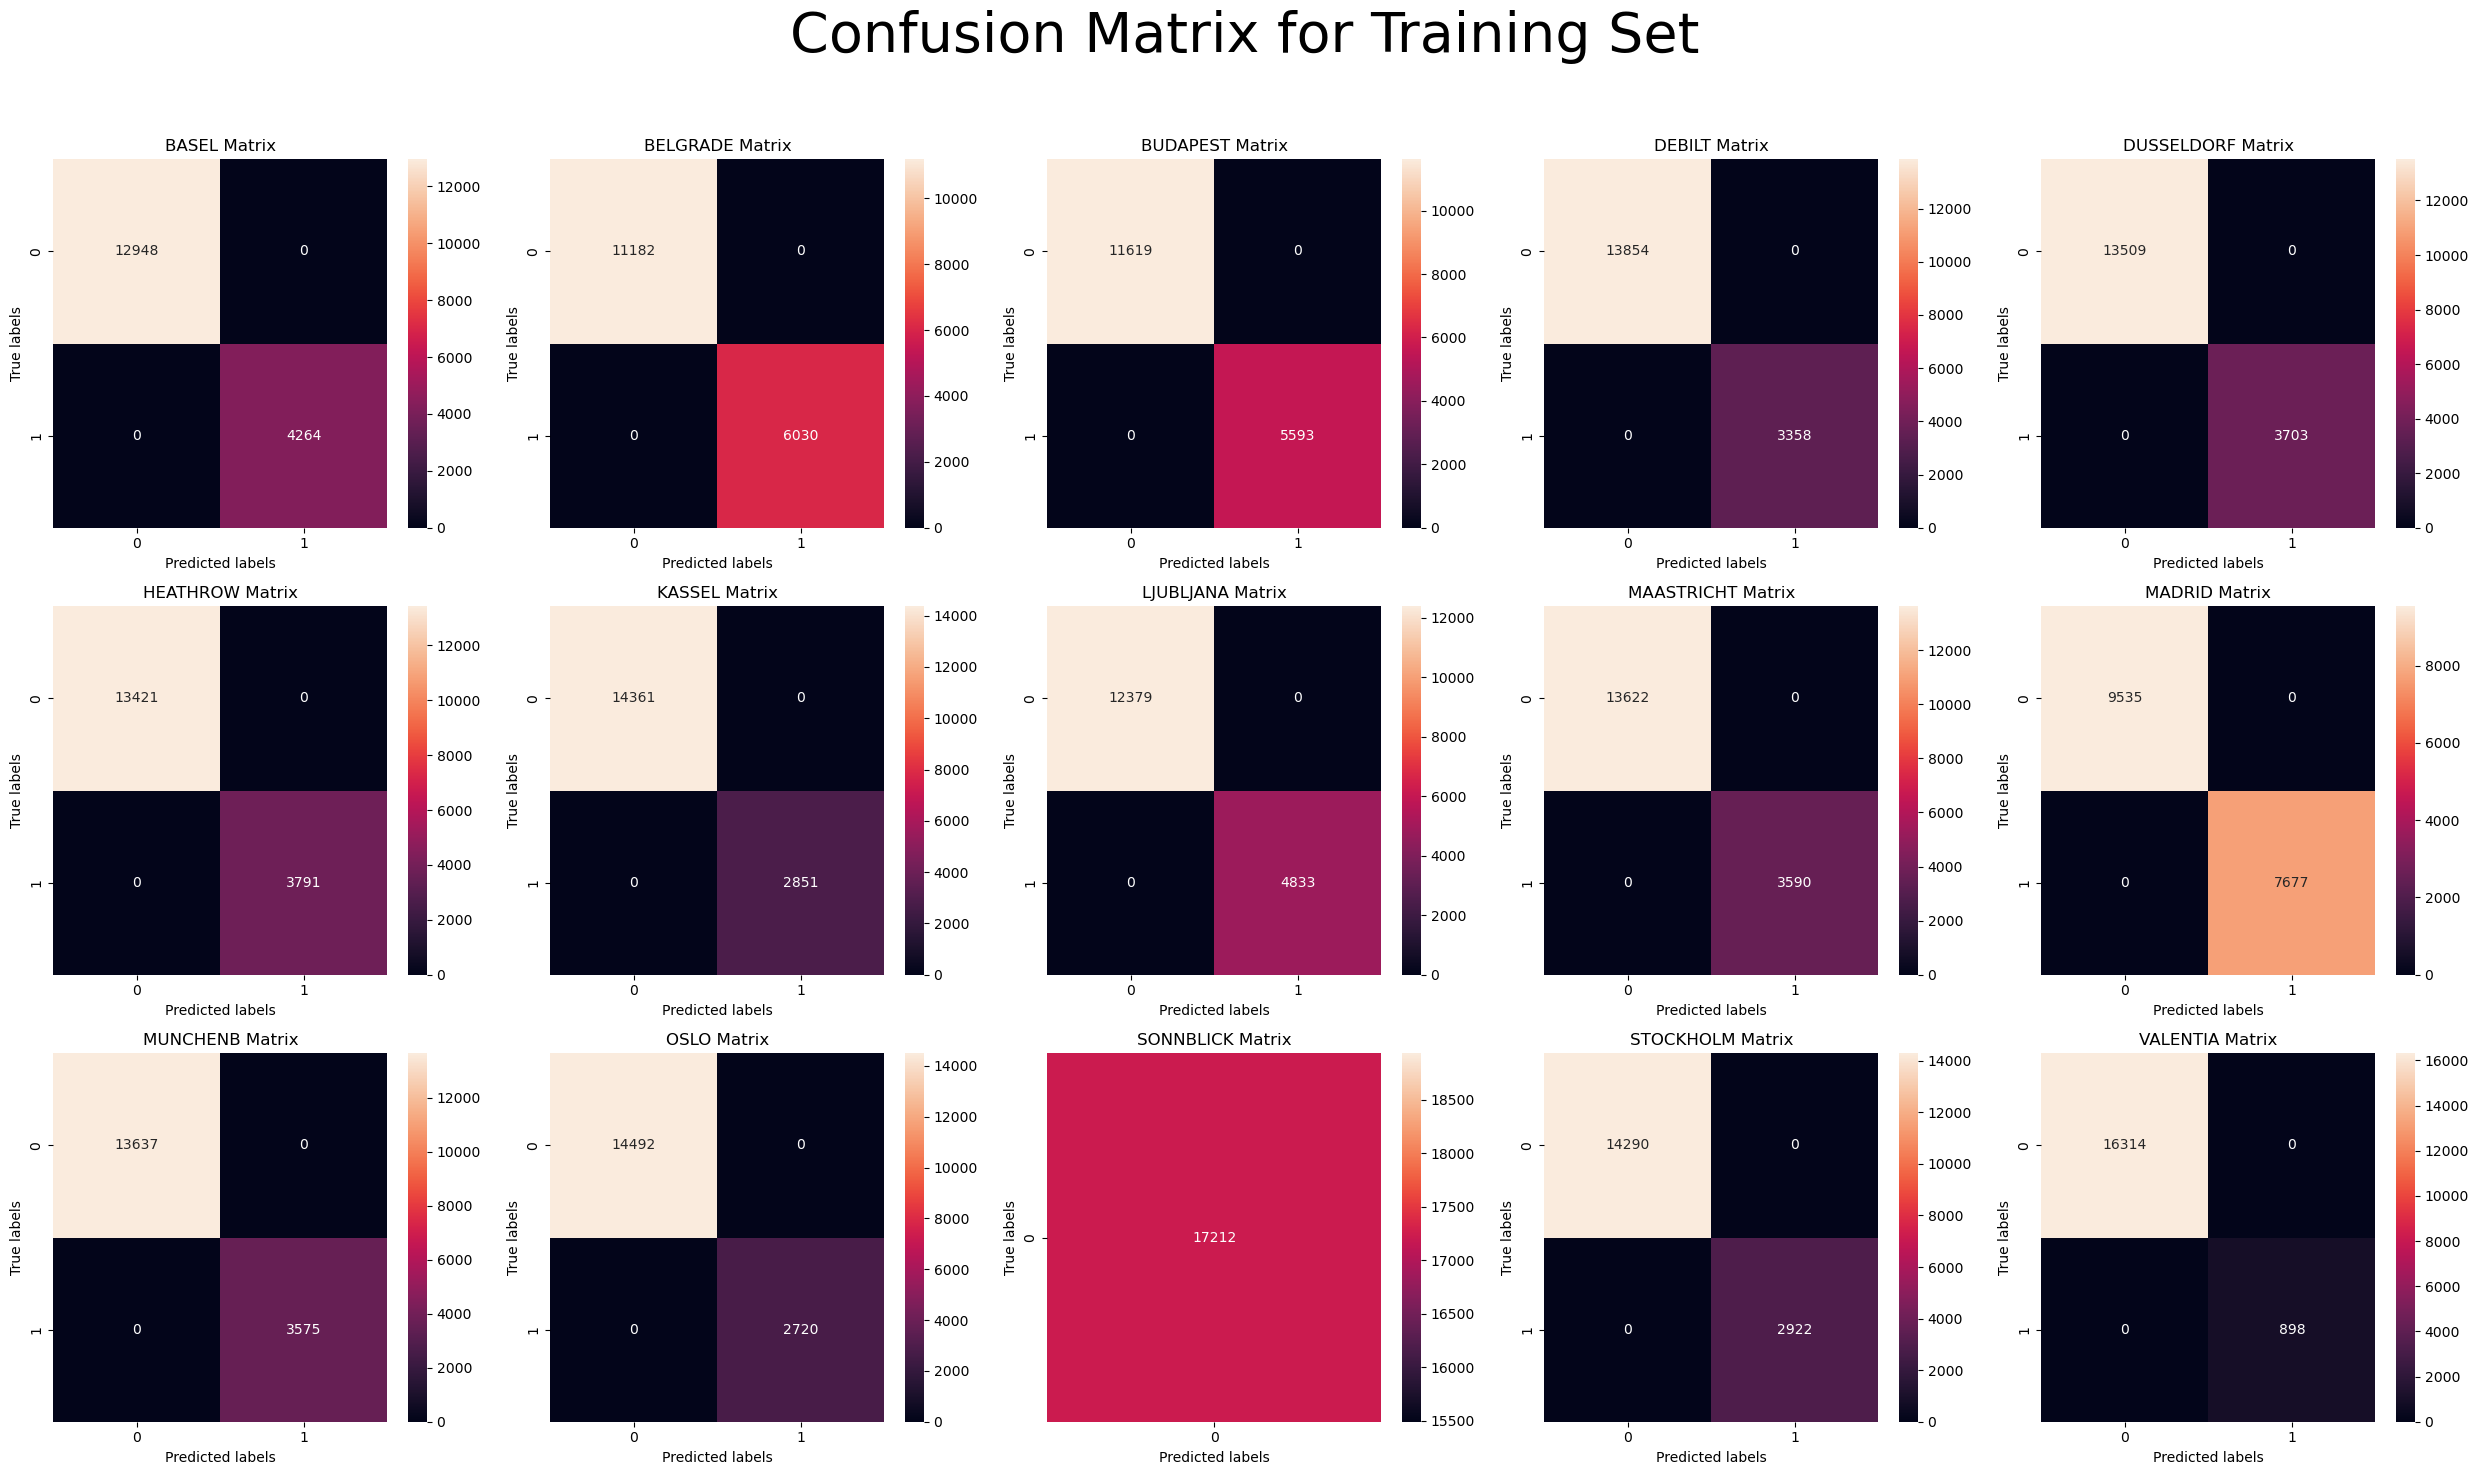

In [26]:
# Confusion Matrix for Training 
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
# Adding a main title for the entire figure
figure.suptitle('Confusion Matrix for Training Set', fontsize=40)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

In [30]:
key = "_pleasant_weather"

metrics_list = []

for count, name in enumerate(locations):
    cm = confusion_matrix(
        y_train.loc[:, name + key],
        y_pred_train[:, count],
        labels=[0, 1]   # 0 = unpleasant, 1 = pleasant
    )

    TN = cm[0, 0]  # Accurate 0
    FP = cm[0, 1]  # False Pos
    FN = cm[1, 0]  # False Neg
    TP = cm[1, 1]  # Accurate 1

    metrics_list.append({
        'Station': name,
        'Accurate 0': TN,
        'Accurate 1': TP,
        'False Pos': FP,
        'False Neg': FN,
        'Accuracy Rate': round((TP + TN) / cm.sum(), 2)
    })

cm_table_train = pd.DataFrame(metrics_list)
cm_table_train


,Station,Accurate 0,Accurate 1,False Pos,False Neg,Accuracy Rate
0,BASEL,12948,4264,0,0,1.0
1,BELGRADE,11182,6030,0,0,1.0
2,BUDAPEST,11619,5593,0,0,1.0
3,DEBILT,13854,3358,0,0,1.0
4,DUSSELDORF,13509,3703,0,0,1.0
5,HEATHROW,13421,3791,0,0,1.0
6,KASSEL,14361,2851,0,0,1.0
7,LJUBLJANA,12379,4833,0,0,1.0
8,MAASTRICHT,13622,3590,0,0,1.0
9,MADRID,9535,7677,0,0,1.0


C:\Users\ophab\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


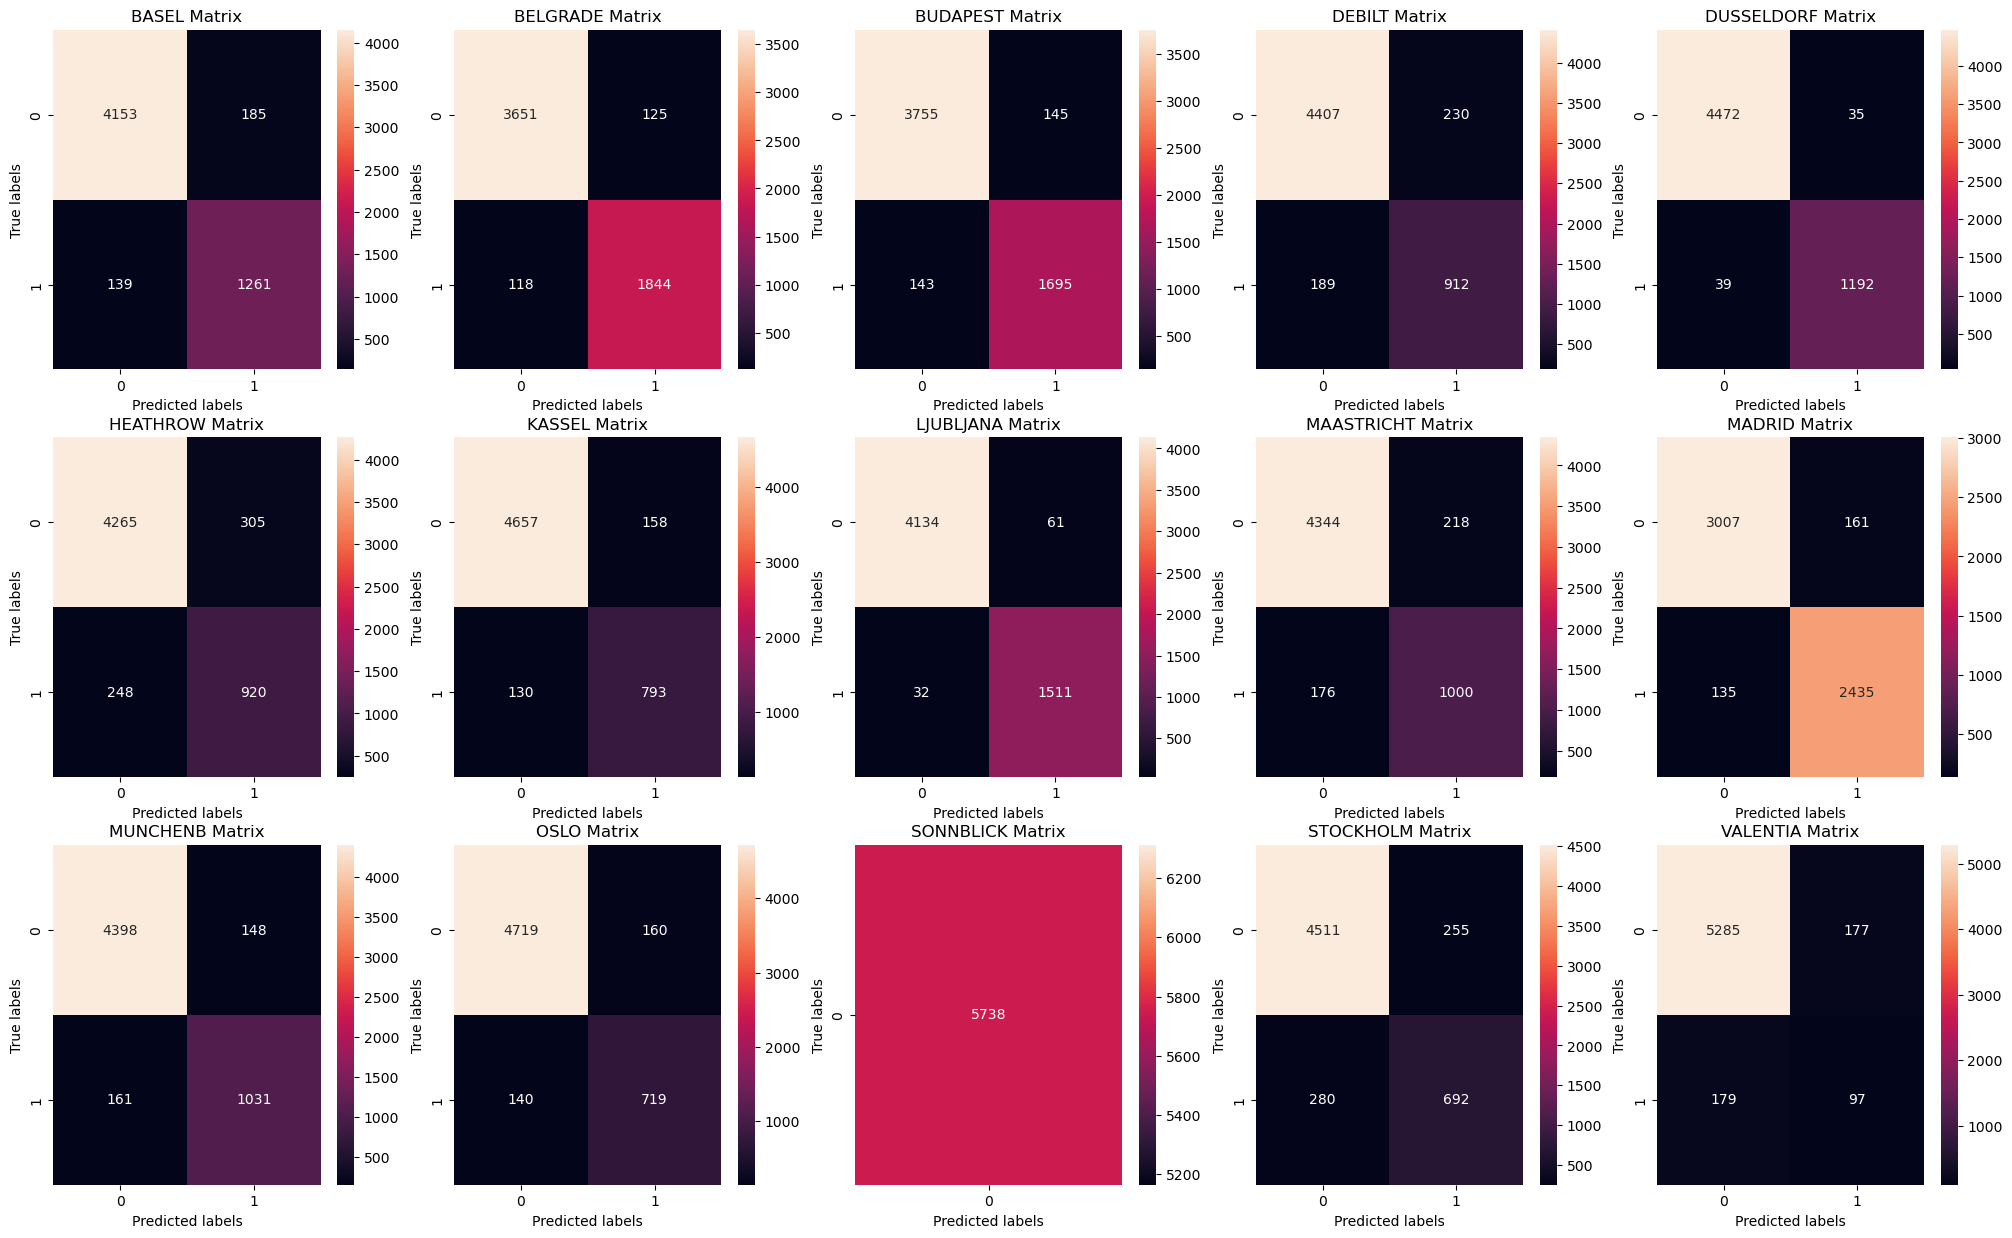

In [40]:
# Confusion Matrix for Test
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [41]:
key = "_pleasant_weather"
metrics_list = []

for count, name in enumerate(locations):
    cm = confusion_matrix(
        y_test.loc[:, name + key],
        y_pred[:, count],
        labels=[0, 1]   # 0 = unpleasant, 1 = pleasant
    )

    TN = cm[0, 0]  # Accurate 0
    FP = cm[0, 1]  # False Pos
    FN = cm[1, 0]  # False Neg
    TP = cm[1, 1]  # Accurate 1

    metrics_list.append({
        'Station': name,
        'Accurate 0': TN,
        'Accurate 1': TP,
        'False Pos': FP,
        'False Neg': FN,
        'Accuracy Rate': round((TP + TN) / cm.sum(), 2)
    })

cm_table_test = pd.DataFrame(metrics_list)
cm_table_test

,Station,Accurate 0,Accurate 1,False Pos,False Neg,Accuracy Rate
0,BASEL,4153,1261,185,139,0.94
1,BELGRADE,3651,1844,125,118,0.96
2,BUDAPEST,3755,1695,145,143,0.95
3,DEBILT,4407,912,230,189,0.93
4,DUSSELDORF,4472,1192,35,39,0.99
5,HEATHROW,4265,920,305,248,0.90
6,KASSEL,4657,793,158,130,0.95
7,LJUBLJANA,4134,1511,61,32,0.98
8,MAASTRICHT,4344,1000,218,176,0.93
9,MADRID,3007,2435,161,135,0.95
